# Waternet Example

- Code: https://github.com/tnwei/waternet
- Original paper: https://arxiv.org/abs/1901.05495

## Init network

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make sure you are connected to a GPU instance
torch.cuda.is_available()

True

In [3]:
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

Using cache found in /root/.cache/torch/hub/tnwei_waternet_main


## Image example

Source: NotBurtsBees - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=115615060

In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg

--2022-05-31 13:43:32--  https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462987 (452K) [image/jpeg]
Saving to: ‘ScubaDiver.jpg.3’

ScubaDiver.jpg.3    100%[===================>] 452.14K  --.-KB/s    in 0.01s   

2022-05-31 13:43:32 (30.1 MB/s) - ‘ScubaDiver.jpg.3’ saved [462987/462987]



In [5]:
# Load one image using OpenCV
im = cv2.imread("ScubaDiver.jpg")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [6]:
# Resize image
rgb_im = cv2.resize(rgb_im, (720, 480))

In [7]:
# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

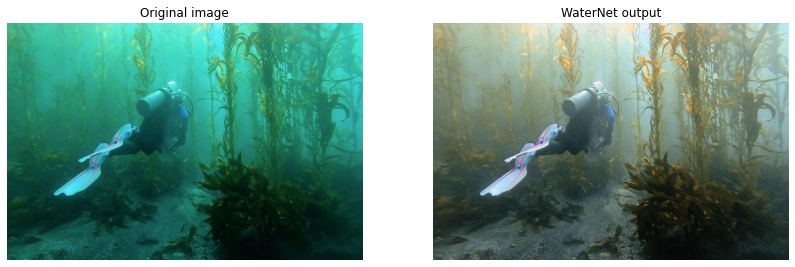

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")

plt.show()